In [1]:
import math
import numpy as np
import ceo
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

In [2]:
BM = ceo.BendingModes(N_MODE=0,N_SURF=7)

# Regular grid

In [3]:
tid = ceo.StopWatch()

In [4]:
b = BM.load('regular')

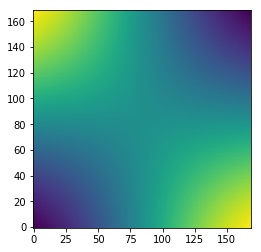

In [5]:
plt.imshow(np.reshape(b.host(),(169,169)),interpolation='none',origin='lower')

In [6]:
NI = 501
di = 8.362/(NI-1)

In [ ]:
def bending_modes_reg(x,N=167):
    di = 8.362/(N-1)    
    tid.tic()
    (B,dBdx,dBdy) = BM.interpolate(N,di,x,grid='regular')
    tid.toc()

    print tid.elapsedTime
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(10,10)
    h = ax[0].imshow(B.host(),interpolation='none',origin='lower')
    ax[1].imshow(dBdx.host(),interpolation='none',origin='lower')
    ax[2].imshow(dBdy.host(),interpolation='none',origin='lower')

In [ ]:
h = interact(bending_modes_reg,x=widgets.IntSlider(min=1,max=162,step=1,continuous_update=False),
         N=widgets.IntSlider(min=32,max=501,step=1,continuous_update=False))

0.421503990889


# GMT

In [ ]:
import math
import numpy as np
import ceo
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline

In [ ]:
gmt = ceo.GMT_MX(M1_mirror_modes=u"bending modes",M1_N_MODE=162)
gmt.M1.keep([1])

In [ ]:
src = ceo.Source("R",rays_box_sampling=201,rays_box_size=25.5,rays_origin=[0,0,25])

In [ ]:
gmt.reset()
#gmt.M1.modes.a = np.random.randn(7,42)*1e-7
#gmt.M1.modes.update()
gmt.propagate(src)

In [ ]:
src.reset()
#gmt.M1.modes.reset()
#gmt.M1.modes.a = q
#gmt.M1.modes.update()
gmt.propagate(src)
plt.imshow(src.phase.host(),interpolation='none')
plt.colorbar()

In [ ]:
gmt.reset()
gmt.M1.modes.a[0,161] = 1e-6
gmt.M1.modes.update()
gmt.propagate(src)
src.reset()
gmt.propagate(src)
plt.imshow(src.phase.host(units='micron'),interpolation='none')
plt.colorbar()
print src.wavefront.rms(-6)